In [68]:
import pandas as pd
import numpy as np
import math
import time
import warnings

warnings.filterwarnings("ignore")

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import brown
from googletrans import Translator

In [16]:
translator = Translator()

In [4]:
df = pd.read_excel("news_file_005930_1.xlsx")

In [5]:
df.head()

,Unnamed: 0,date,body
0,https://finance.naver.com/item/news_read.nhn?a...,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...
1,https://finance.naver.com/item/news_read.nhn?a...,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...
2,https://finance.naver.com/item/news_read.nhn?a...,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...
3,https://finance.naver.com/item/news_read.nhn?a...,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...
4,https://finance.naver.com/item/news_read.nhn?a...,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...


In [6]:
df_trans_eng = df[["date", "body"]]

In [7]:
df_trans_eng.head()

,date,body
0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...
1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...
2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...
3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...
4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...


In [8]:
df_trans_eng["trans"] =""

In [9]:
df_trans_eng.head()

,date,body,trans
0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...,
1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...,
2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...,
3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...,
4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...,


In [10]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 
# if IOPub data rate exceeded.

In [11]:
len(df_trans_eng)

4021

In [12]:
df_trans_eng.head()

,date,body,trans
0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...,
1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...,
2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...,
3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...,
4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...,


In [13]:
# warning!! If you request googletrans to translate too many text at once, Google will block your IP.

In [ ]:
%%time

for i in range(1,len(df_trans_eng)):
    
    start_num = 0
    temp_trans =""
    body_str = str(df_trans_eng['body'][i])
    re_num = math.ceil(len(body_str) / 2000)
    
    print("{} articles translating... ".format(i))

    for j in range(1,re_num+1):
        
        tran_str = body_str[start_num:2000*j]

        start_num = 2000 * j

        tr_results = translator.translate(tran_str)

        temp_trans = temp_trans + tr_results.text

    #print(temp_trans)

    df_trans_eng["trans"][i] = temp_trans
    
    #time.sleep(3)

In [14]:
#df_trans_eng.to_excel("trans_eng_final.xlsx")
trans_eng_final = pd.read_excel("trans_eng_final.xlsx")

In [59]:
trans_eng_final.head()

,Unnamed: 0,date,body,trans,positive,negative,pol_score
0,0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...,NaN,0.5000,0.5000,0.0000
1,1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...,Gimjihyeong Samsung Compliance Committee is to...,0.9954,0.0046,0.9908
2,2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...,Contemporary Terra Tower Yeongtong perspective...,0.9990,0.0010,0.9980
3,3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...,Financial News Korea Securities Depository ann...,0.9945,0.0055,0.9890
4,4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...,Photo courtesy of Korea Securities Depository ...,0.8676,0.1324,0.7351


In [60]:
trans_eng_final.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [61]:
sia = SentimentIntensityAnalyzer()

In [62]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [66]:
trans_eng_final["pol_score"] = 0.0
trans_eng_final["positive"] = 0.0
trans_eng_final["negative"] = 0.0

In [67]:
trans_eng_final.head()

,date,body,trans,positive,negative,pol_score
0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...,NaN,0.0,0.0,0.0
1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...,Gimjihyeong Samsung Compliance Committee is to...,0.0,0.0,0.0
2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...,Contemporary Terra Tower Yeongtong perspective...,0.0,0.0,0.0
3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...,Financial News Korea Securities Depository ann...,0.0,0.0,0.0
4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...,Photo courtesy of Korea Securities Depository ...,0.0,0.0,0.0


In [69]:
for i in range(len(trans_eng_final)):
        
    pol_scores = sia.polarity_scores(str(trans_eng_final['trans'][i]))['compound']
    
    trans_eng_final["pol_score"][i] = round(pol_scores,4)
    
    #print(pol_scores)
    
    if pol_scores >= 0 :        
        
        positive_score = round((pol_scores / 2) + 0.50,4)
        negative_score = round(1 - positive_score, 4)
    
        trans_eng_final["positive"][i] = positive_score

        trans_eng_final["negative"][i] = negative_score
        
    else :
        
        negative_score = round(abs(pol_scores / 2) + 0.50,4)
        positive_score = round(1 - negative_score,4)

        trans_eng_final["negative"][i] = negative_score
        
        trans_eng_final["positive"][i] = positive_score
        
    
    #po_scores.append(sia.polarity_scores(str(trans_eng_final['trans'][i]))['compound'])
    
    print("article {}    positive : {}    negative : {}    score : {}".format(i, 
                                                                              trans_eng_final["positive"][i],
                                                                              trans_eng_final["negative"][i],
                                                                             trans_eng_final["pol_score"][i]))
    

article 0    positive : 0.5    negative : 0.5    score : 0.0
article 1    positive : 0.9954    negative : 0.0046    score : 0.9908
article 2    positive : 0.999    negative : 0.001    score : 0.998
article 3    positive : 0.9945    negative : 0.0055    score : 0.989
article 4    positive : 0.8676    negative : 0.1324    score : 0.7351
article 5    positive : 0.7384    negative : 0.2616    score : 0.4767
article 6    positive : 0.7712    negative : 0.2288    score : 0.5423
article 7    positive : 0.8353    negative : 0.1647    score : 0.6705
article 8    positive : 0.2367    negative : 0.7633    score : -0.5267
article 9    positive : 0.0489    negative : 0.9511    score : -0.9023
article 10    positive : 0.4111    negative : 0.5889    score : -0.1779
article 11    positive : 0.8891    negative : 0.1109    score : 0.7783
article 12    positive : 0.9417    negative : 0.0583    score : 0.8834
article 13    positive : 0.6161    negative : 0.3839    score : 0.2323
article 14    positive : 0

article 128    positive : 0.783    negative : 0.217    score : 0.5659
article 129    positive : 0.9965    negative : 0.0035    score : 0.9929
article 130    positive : 0.9404    negative : 0.0596    score : 0.8807
article 131    positive : 0.8965    negative : 0.1035    score : 0.793
article 132    positive : 0.9905    negative : 0.0095    score : 0.981
article 133    positive : 0.6461    negative : 0.3539    score : 0.2921
article 134    positive : 0.003    negative : 0.997    score : -0.994
article 135    positive : 0.9896    negative : 0.0104    score : 0.9792
article 136    positive : 0.9899    negative : 0.0101    score : 0.9799
article 137    positive : 0.9977    negative : 0.0023    score : 0.9954
article 138    positive : 0.9974    negative : 0.0026    score : 0.9948
article 139    positive : 0.9921    negative : 0.0079    score : 0.9843
article 140    positive : 0.9948    negative : 0.0052    score : 0.9896
article 141    positive : 0.9955    negative : 0.0045    score : 0.991

article 271    positive : 0.998    negative : 0.002    score : 0.9961
article 272    positive : 0.9964    negative : 0.0036    score : 0.9928
article 273    positive : 0.9981    negative : 0.0019    score : 0.9963
article 274    positive : 0.9992    negative : 0.0008    score : 0.9985
article 275    positive : 0.991    negative : 0.009    score : 0.9821
article 276    positive : 0.5386    negative : 0.4614    score : 0.0772
article 277    positive : 0.5386    negative : 0.4614    score : 0.0772
article 278    positive : 0.5386    negative : 0.4614    score : 0.0772
article 279    positive : 0.012    negative : 0.988    score : -0.976
article 280    positive : 0.345    negative : 0.655    score : -0.31
article 281    positive : 0.8676    negative : 0.1324    score : 0.7351
article 282    positive : 0.1815    negative : 0.8185    score : -0.6369
article 283    positive : 0.2573    negative : 0.7427    score : -0.4854
article 284    positive : 0.0557    negative : 0.9443    score : -0.888

article 401    positive : 0.7673    negative : 0.2327    score : 0.5346
article 402    positive : 0.9762    negative : 0.0238    score : 0.9523
article 403    positive : 0.9973    negative : 0.0027    score : 0.9946
article 404    positive : 0.9691    negative : 0.0309    score : 0.9382
article 405    positive : 0.9847    negative : 0.0153    score : 0.9694
article 406    positive : 0.9295    negative : 0.0705    score : 0.8591
article 407    positive : 0.9986    negative : 0.0014    score : 0.9971
article 408    positive : 0.9779    negative : 0.0221    score : 0.9559
article 409    positive : 0.9927    negative : 0.0073    score : 0.9853
article 410    positive : 0.7859    negative : 0.2141    score : 0.5719
article 411    positive : 0.6591    negative : 0.3409    score : 0.3182
article 412    positive : 0.9925    negative : 0.0075    score : 0.985
article 413    positive : 0.9924    negative : 0.0076    score : 0.9847
article 414    positive : 0.9883    negative : 0.0117    score : 

article 549    positive : 0.9932    negative : 0.0068    score : 0.9865
article 550    positive : 0.9955    negative : 0.0045    score : 0.991
article 551    positive : 0.9947    negative : 0.0053    score : 0.9893
article 552    positive : 0.998    negative : 0.002    score : 0.9961
article 553    positive : 0.9969    negative : 0.0031    score : 0.9937
article 554    positive : 0.996    negative : 0.004    score : 0.9921
article 555    positive : 0.9845    negative : 0.0155    score : 0.9689
article 556    positive : 0.971    negative : 0.029    score : 0.942
article 557    positive : 0.9794    negative : 0.0206    score : 0.9588
article 558    positive : 0.9967    negative : 0.0033    score : 0.9934
article 559    positive : 0.9967    negative : 0.0033    score : 0.9933
article 560    positive : 0.9989    negative : 0.0011    score : 0.9978
article 561    positive : 0.9212    negative : 0.0788    score : 0.8424
article 562    positive : 0.9867    negative : 0.0133    score : 0.9734


article 708    positive : 0.9993    negative : 0.0007    score : 0.9986
article 709    positive : 0.9995    negative : 0.0005    score : 0.999
article 710    positive : 0.9993    negative : 0.0007    score : 0.9987
article 711    positive : 0.9991    negative : 0.0009    score : 0.9982
article 712    positive : 0.9995    negative : 0.0005    score : 0.999
article 713    positive : 0.9992    negative : 0.0008    score : 0.9985
article 714    positive : 0.9993    negative : 0.0007    score : 0.9986
article 715    positive : 0.9936    negative : 0.0064    score : 0.9872
article 716    positive : 0.9944    negative : 0.0056    score : 0.9887
article 717    positive : 0.9963    negative : 0.0037    score : 0.9926
article 718    positive : 0.9738    negative : 0.0262    score : 0.9477
article 719    positive : 0.9702    negative : 0.0298    score : 0.9403
article 720    positive : 0.9337    negative : 0.0663    score : 0.8674
article 721    positive : 0.9913    negative : 0.0087    score : 0

article 836    positive : 0.9933    negative : 0.0067    score : 0.9867
article 837    positive : 0.9946    negative : 0.0054    score : 0.9892
article 838    positive : 0.9945    negative : 0.0055    score : 0.9889
article 839    positive : 0.999    negative : 0.001    score : 0.9981
article 840    positive : 0.9754    negative : 0.0246    score : 0.9509
article 841    positive : 0.9922    negative : 0.0078    score : 0.9844
article 842    positive : 0.5514    negative : 0.4486    score : 0.1027
article 843    positive : 0.9973    negative : 0.0027    score : 0.9946
article 844    positive : 0.9845    negative : 0.0155    score : 0.9689
article 845    positive : 0.9963    negative : 0.0037    score : 0.9926
article 846    positive : 0.9995    negative : 0.0005    score : 0.9991
article 847    positive : 0.9993    negative : 0.0007    score : 0.9986
article 848    positive : 0.8891    negative : 0.1109    score : 0.7783
article 849    positive : 0.9637    negative : 0.0363    score : 0

article 967    positive : 0.9668    negative : 0.0332    score : 0.9337
article 968    positive : 0.9601    negative : 0.0399    score : 0.9201
article 969    positive : 0.4807    negative : 0.5193    score : -0.0387
article 970    positive : 0.7787    negative : 0.2213    score : 0.5574
article 971    positive : 0.7787    negative : 0.2213    score : 0.5574
article 972    positive : 0.9417    negative : 0.0583    score : 0.8834
article 973    positive : 0.9467    negative : 0.0533    score : 0.8934
article 974    positive : 0.8548    negative : 0.1452    score : 0.7096
article 975    positive : 0.6806    negative : 0.3194    score : 0.3612
article 976    positive : 0.3634    negative : 0.6366    score : -0.2732
article 977    positive : 0.9951    negative : 0.0049    score : 0.9902
article 978    positive : 0.2573    negative : 0.7427    score : -0.4854
article 979    positive : 0.9221    negative : 0.0779    score : 0.8442
article 980    positive : 0.7155    negative : 0.2845    scor

article 1115    positive : 0.9511    negative : 0.0489    score : 0.9022
article 1116    positive : 0.3634    negative : 0.6366    score : -0.2732
article 1117    positive : 0.9404    negative : 0.0596    score : 0.8807
article 1118    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1119    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1120    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1121    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1122    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1123    positive : 0.9674    negative : 0.0326    score : 0.9349
article 1124    positive : 0.9742    negative : 0.0258    score : 0.9483
article 1125    positive : 0.9971    negative : 0.0029    score : 0.9943
article 1126    positive : 0.9981    negative : 0.0019    score : 0.9963
article 1127    positive : 0.0317    negative : 0.9683    score : -0.9366
article 1128    positive : 0.9838    negative : 0

article 1236    positive : 0.9817    negative : 0.0183    score : 0.9633
article 1237    positive : 0.0095    negative : 0.9905    score : -0.981
article 1238    positive : 0.9992    negative : 0.0008    score : 0.9984
article 1239    positive : 0.9994    negative : 0.0006    score : 0.9989
article 1240    positive : 0.9989    negative : 0.0011    score : 0.9977
article 1241    positive : 0.9998    negative : 0.0002    score : 0.9995
article 1242    positive : 0.9998    negative : 0.0002    score : 0.9996
article 1243    positive : 0.9974    negative : 0.0026    score : 0.9949
article 1244    positive : 0.9971    negative : 0.0029    score : 0.9943
article 1245    positive : 0.9741    negative : 0.0259    score : 0.9481
article 1246    positive : 0.995    negative : 0.005    score : 0.9899
article 1247    positive : 0.9983    negative : 0.0017    score : 0.9965
article 1248    positive : 0.994    negative : 0.006    score : 0.9881
article 1249    positive : 0.9804    negative : 0.0196 

article 1357    positive : 0.9711    negative : 0.0289    score : 0.9423
article 1358    positive : 0.9934    negative : 0.0066    score : 0.9869
article 1359    positive : 0.9937    negative : 0.0063    score : 0.9874
article 1360    positive : 0.9795    negative : 0.0205    score : 0.959
article 1361    positive : 0.6909    negative : 0.3091    score : 0.3818
article 1362    positive : 0.6591    negative : 0.3409    score : 0.3182
article 1363    positive : 0.7107    negative : 0.2893    score : 0.4215
article 1364    positive : 0.9711    negative : 0.0289    score : 0.9423
article 1365    positive : 0.9979    negative : 0.0021    score : 0.9957
article 1366    positive : 0.9585    negative : 0.0415    score : 0.9169
article 1367    positive : 0.9697    negative : 0.0303    score : 0.9393
article 1368    positive : 0.9568    negative : 0.0432    score : 0.9136
article 1369    positive : 0.965    negative : 0.035    score : 0.93
article 1370    positive : 0.9779    negative : 0.0221  

article 1502    positive : 0.9526    negative : 0.0474    score : 0.9051
article 1503    positive : 0.9417    negative : 0.0583    score : 0.8834
article 1504    positive : 0.9974    negative : 0.0026    score : 0.9948
article 1505    positive : 0.0147    negative : 0.9853    score : -0.9707
article 1506    positive : 0.0364    negative : 0.9636    score : -0.9271
article 1507    positive : 0.9967    negative : 0.0033    score : 0.9933
article 1508    positive : 0.9923    negative : 0.0077    score : 0.9846
article 1509    positive : 0.995    negative : 0.005    score : 0.99
article 1510    positive : 0.9949    negative : 0.0051    score : 0.9898
article 1511    positive : 0.9946    negative : 0.0054    score : 0.9892
article 1512    positive : 0.9961    negative : 0.0039    score : 0.9922
article 1513    positive : 0.9982    negative : 0.0018    score : 0.9964
article 1514    positive : 0.9963    negative : 0.0037    score : 0.9926
article 1515    positive : 0.0793    negative : 0.920

article 1619    positive : 0.9845    negative : 0.0155    score : 0.969
article 1620    positive : 0.9778    negative : 0.0222    score : 0.9556
article 1621    positive : 0.9987    negative : 0.0013    score : 0.9974
article 1622    positive : 0.1078    negative : 0.8922    score : -0.7845
article 1623    positive : 0.9626    negative : 0.0374    score : 0.9252
article 1624    positive : 0.9993    negative : 0.0007    score : 0.9986
article 1625    positive : 0.8635    negative : 0.1365    score : 0.7269
article 1626    positive : 0.9993    negative : 0.0007    score : 0.9986
article 1627    positive : 0.9993    negative : 0.0007    score : 0.9987
article 1628    positive : 0.998    negative : 0.002    score : 0.9959
article 1629    positive : 0.9988    negative : 0.0012    score : 0.9975
article 1630    positive : 0.0387    negative : 0.9613    score : -0.9227
article 1631    positive : 0.9953    negative : 0.0047    score : 0.9906
article 1632    positive : 0.9944    negative : 0.00

article 1748    positive : 0.9092    negative : 0.0908    score : 0.8184
article 1749    positive : 0.396    negative : 0.604    score : -0.2081
article 1750    positive : 0.9991    negative : 0.0009    score : 0.9983
article 1751    positive : 0.9984    negative : 0.0016    score : 0.9967
article 1752    positive : 0.9994    negative : 0.0006    score : 0.9989
article 1753    positive : 0.9941    negative : 0.0059    score : 0.9883
article 1754    positive : 0.9994    negative : 0.0006    score : 0.9989
article 1755    positive : 0.9994    negative : 0.0006    score : 0.9988
article 1756    positive : 0.9992    negative : 0.0008    score : 0.9985
article 1757    positive : 0.9986    negative : 0.0014    score : 0.9972
article 1758    positive : 0.9995    negative : 0.0005    score : 0.9991
article 1759    positive : 0.9987    negative : 0.0013    score : 0.9974
article 1760    positive : 0.8859    negative : 0.1141    score : 0.7717
article 1761    positive : 0.319    negative : 0.681

article 1879    positive : 0.9994    negative : 0.0006    score : 0.9989
article 1880    positive : 0.9985    negative : 0.0015    score : 0.997
article 1881    positive : 0.999    negative : 0.001    score : 0.9981
article 1882    positive : 0.9999    negative : 0.0001    score : 0.9997
article 1883    positive : 0.929    negative : 0.071    score : 0.8581
article 1884    positive : 0.9703    negative : 0.0297    score : 0.9405
article 1885    positive : 0.999    negative : 0.001    score : 0.998
article 1886    positive : 0.9995    negative : 0.0005    score : 0.999
article 1887    positive : 0.9931    negative : 0.0069    score : 0.9862
article 1888    positive : 0.9984    negative : 0.0016    score : 0.9967
article 1889    positive : 0.9996    negative : 0.0004    score : 0.9993
article 1890    positive : 0.9994    negative : 0.0006    score : 0.9988
article 1891    positive : 0.9998    negative : 0.0002    score : 0.9995
article 1892    positive : 0.999    negative : 0.001    scor

article 2011    positive : 0.9988    negative : 0.0012    score : 0.9975
article 2012    positive : 0.9924    negative : 0.0076    score : 0.9848
article 2013    positive : 0.9926    negative : 0.0074    score : 0.9851
article 2014    positive : 0.9893    negative : 0.0107    score : 0.9786
article 2015    positive : 0.9869    negative : 0.0131    score : 0.9739
article 2016    positive : 0.918    negative : 0.082    score : 0.836
article 2017    positive : 0.9992    negative : 0.0008    score : 0.9985
article 2018    positive : 0.999    negative : 0.001    score : 0.9981
article 2019    positive : 0.9992    negative : 0.0008    score : 0.9984
article 2020    positive : 0.9991    negative : 0.0009    score : 0.9982
article 2021    positive : 0.9993    negative : 0.0007    score : 0.9987
article 2022    positive : 0.9991    negative : 0.0009    score : 0.9982
article 2023    positive : 0.9935    negative : 0.0065    score : 0.9871
article 2024    positive : 0.9994    negative : 0.0006  

article 2133    positive : 0.9964    negative : 0.0036    score : 0.9927
article 2134    positive : 0.6909    negative : 0.3091    score : 0.3818
article 2135    positive : 0.7294    negative : 0.2706    score : 0.4588
article 2136    positive : 0.9988    negative : 0.0012    score : 0.9976
article 2137    positive : 0.9878    negative : 0.0122    score : 0.9756
article 2138    positive : 0.9914    negative : 0.0086    score : 0.9829
article 2139    positive : 0.994    negative : 0.006    score : 0.9879
article 2140    positive : 0.9753    negative : 0.0247    score : 0.9506
article 2141    positive : 0.9833    negative : 0.0167    score : 0.9667
article 2142    positive : 0.9939    negative : 0.0061    score : 0.9878
article 2143    positive : 0.994    negative : 0.006    score : 0.9881
article 2144    positive : 0.9702    negative : 0.0298    score : 0.9403
article 2145    positive : 0.9952    negative : 0.0048    score : 0.9905
article 2146    positive : 0.9875    negative : 0.0125 

article 2256    positive : 0.0112    negative : 0.9888    score : -0.9776
article 2257    positive : 0.0089    negative : 0.9911    score : -0.9822
article 2258    positive : 0.3387    negative : 0.6613    score : -0.3227
article 2259    positive : 0.0102    negative : 0.9898    score : -0.9796
article 2260    positive : 0.0539    negative : 0.9461    score : -0.8922
article 2261    positive : 0.9991    negative : 0.0009    score : 0.9983
article 2262    positive : 0.9988    negative : 0.0012    score : 0.9975
article 2263    positive : 0.9988    negative : 0.0012    score : 0.9976
article 2264    positive : 0.9924    negative : 0.0076    score : 0.9847
article 2265    positive : 0.0329    negative : 0.9671    score : -0.9343
article 2266    positive : 0.9949    negative : 0.0051    score : 0.9898
article 2267    positive : 0.9716    negative : 0.0284    score : 0.9432
article 2268    positive : 0.988    negative : 0.012    score : 0.9761
article 2269    positive : 0.9819    negative :

article 2378    positive : 0.9925    negative : 0.0075    score : 0.9849
article 2379    positive : 0.9996    negative : 0.0004    score : 0.9992
article 2380    positive : 0.9983    negative : 0.0017    score : 0.9965
article 2381    positive : 0.9826    negative : 0.0174    score : 0.9652
article 2382    positive : 0.99    negative : 0.01    score : 0.98
article 2383    positive : 0.9837    negative : 0.0163    score : 0.9674
article 2384    positive : 0.9995    negative : 0.0005    score : 0.9991
article 2385    positive : 0.9982    negative : 0.0018    score : 0.9964
article 2386    positive : 0.9948    negative : 0.0052    score : 0.9896
article 2387    positive : 0.9668    negative : 0.0332    score : 0.9337
article 2388    positive : 0.9657    negative : 0.0343    score : 0.9313
article 2389    positive : 0.9913    negative : 0.0087    score : 0.9826
article 2390    positive : 0.9981    negative : 0.0019    score : 0.9962
article 2391    positive : 0.9988    negative : 0.0012   

article 2501    positive : 0.999    negative : 0.001    score : 0.998
article 2502    positive : 0.9866    negative : 0.0134    score : 0.9732
article 2503    positive : 0.1925    negative : 0.8075    score : -0.6151
article 2504    positive : 0.0074    negative : 0.9926    score : -0.9851
article 2505    positive : 0.2191    negative : 0.7809    score : -0.5617
article 2506    positive : 0.0108    negative : 0.9892    score : -0.9784
article 2507    positive : 0.0252    negative : 0.9748    score : -0.9497
article 2508    positive : 0.9577    negative : 0.0423    score : 0.9154
article 2509    positive : 0.9815    negative : 0.0185    score : 0.963
article 2510    positive : 0.9994    negative : 0.0006    score : 0.9989
article 2511    positive : 0.0457    negative : 0.9543    score : -0.9085
article 2512    positive : 0.9637    negative : 0.0363    score : 0.9274
article 2513    positive : 0.9925    negative : 0.0075    score : 0.985
article 2514    positive : 0.9792    negative : 0.

article 2636    positive : 0.9976    negative : 0.0024    score : 0.9953
article 2637    positive : 0.747    negative : 0.253    score : 0.4939
article 2638    positive : 0.9521    negative : 0.0479    score : 0.9042
article 2639    positive : 0.9994    negative : 0.0006    score : 0.9988
article 2640    positive : 0.9926    negative : 0.0074    score : 0.9851
article 2641    positive : 0.8145    negative : 0.1855    score : 0.6289
article 2642    positive : 0.9908    negative : 0.0092    score : 0.9816
article 2643    positive : 0.9914    negative : 0.0086    score : 0.9828
article 2644    positive : 0.9981    negative : 0.0019    score : 0.9963
article 2645    positive : 0.4234    negative : 0.5766    score : -0.1531
article 2646    positive : 0.9955    negative : 0.0045    score : 0.991
article 2647    positive : 0.9966    negative : 0.0034    score : 0.9932
article 2648    positive : 0.9984    negative : 0.0016    score : 0.9968
article 2649    positive : 0.9927    negative : 0.007

article 2759    positive : 0.9608    negative : 0.0392    score : 0.9217
article 2760    positive : 0.9872    negative : 0.0128    score : 0.9744
article 2761    positive : 0.793    negative : 0.207    score : 0.5859
article 2762    positive : 0.996    negative : 0.004    score : 0.992
article 2763    positive : 0.997    negative : 0.003    score : 0.994
article 2764    positive : 0.9995    negative : 0.0005    score : 0.9991
article 2765    positive : 0.9988    negative : 0.0012    score : 0.9975
article 2766    positive : 0.9966    negative : 0.0034    score : 0.9931
article 2767    positive : 0.9965    negative : 0.0035    score : 0.993
article 2768    positive : 0.9754    negative : 0.0246    score : 0.9509
article 2769    positive : 0.9959    negative : 0.0041    score : 0.9918
article 2770    positive : 0.9961    negative : 0.0039    score : 0.9922
article 2771    positive : 0.9814    negative : 0.0186    score : 0.9628
article 2772    positive : 0.7107    negative : 0.2893    sc

article 2906    positive : 0.9997    negative : 0.0003    score : 0.9994
article 2907    positive : 0.9995    negative : 0.0005    score : 0.9991
article 2908    positive : 0.9985    negative : 0.0015    score : 0.997
article 2909    positive : 0.9991    negative : 0.0009    score : 0.9982
article 2910    positive : 0.9988    negative : 0.0012    score : 0.9975
article 2911    positive : 0.9911    negative : 0.0089    score : 0.9823
article 2912    positive : 0.9993    negative : 0.0007    score : 0.9986
article 2913    positive : 0.9995    negative : 0.0005    score : 0.9991
article 2914    positive : 0.9994    negative : 0.0006    score : 0.9988
article 2915    positive : 0.9955    negative : 0.0045    score : 0.9911
article 2916    positive : 0.996    negative : 0.004    score : 0.9921
article 2917    positive : 0.9963    negative : 0.0037    score : 0.9926
article 2918    positive : 0.9978    negative : 0.0022    score : 0.9955
article 2919    positive : 0.9952    negative : 0.0048

article 3027    positive : 0.8592    negative : 0.1408    score : 0.7184
article 3028    positive : 0.9766    negative : 0.0234    score : 0.9531
article 3029    positive : 0.9783    negative : 0.0217    score : 0.9565
article 3030    positive : 0.099    negative : 0.901    score : -0.802
article 3031    positive : 0.7553    negative : 0.2447    score : 0.5106
article 3032    positive : 0.4789    negative : 0.5211    score : -0.0422
article 3033    positive : 0.9731    negative : 0.0269    score : 0.9462
article 3034    positive : 0.7384    negative : 0.2616    score : 0.4767
article 3035    positive : 0.9597    negative : 0.0403    score : 0.9194
article 3036    positive : 0.9804    negative : 0.0196    score : 0.9607
article 3037    positive : 0.9935    negative : 0.0065    score : 0.987
article 3038    positive : 0.9999    negative : 0.0001    score : 0.9998
article 3039    positive : 0.8891    negative : 0.1109    score : 0.7783
article 3040    positive : 0.9995    negative : 0.000

article 3170    positive : 0.9947    negative : 0.0053    score : 0.9893
article 3171    positive : 0.996    negative : 0.004    score : 0.9919
article 3172    positive : 0.9962    negative : 0.0038    score : 0.9924
article 3173    positive : 0.9994    negative : 0.0006    score : 0.9989
article 3174    positive : 0.9995    negative : 0.0005    score : 0.999
article 3175    positive : 0.9996    negative : 0.0004    score : 0.9992
article 3176    positive : 0.9971    negative : 0.0029    score : 0.9942
article 3177    positive : 0.9802    negative : 0.0198    score : 0.9604
article 3178    positive : 0.9955    negative : 0.0045    score : 0.991
article 3179    positive : 0.9993    negative : 0.0007    score : 0.9986
article 3180    positive : 0.9991    negative : 0.0009    score : 0.9983
article 3181    positive : 0.99    negative : 0.01    score : 0.98
article 3182    positive : 0.9818    negative : 0.0182    score : 0.9636
article 3183    positive : 0.9829    negative : 0.0171    sco

article 3328    positive : 0.9982    negative : 0.0018    score : 0.9964
article 3329    positive : 0.9949    negative : 0.0051    score : 0.9898
article 3330    positive : 0.9991    negative : 0.0009    score : 0.9982
article 3331    positive : 0.9975    negative : 0.0025    score : 0.995
article 3332    positive : 0.9891    negative : 0.0109    score : 0.9783
article 3333    positive : 0.994    negative : 0.006    score : 0.9881
article 3334    positive : 0.9969    negative : 0.0031    score : 0.9938
article 3335    positive : 0.7588    negative : 0.2412    score : 0.5175
article 3336    positive : 0.9997    negative : 0.0003    score : 0.9994
article 3337    positive : 0.9945    negative : 0.0055    score : 0.989
article 3338    positive : 0.9964    negative : 0.0036    score : 0.9928
article 3339    positive : 0.8676    negative : 0.1324    score : 0.7351
article 3340    positive : 0.9943    negative : 0.0057    score : 0.9886
article 3341    positive : 0.5    negative : 0.5    sco

article 3464    positive : 0.9999    negative : 0.0001    score : 0.9998
article 3465    positive : 0.8298    negative : 0.1702    score : 0.6597
article 3466    positive : 0.9985    negative : 0.0015    score : 0.997
article 3467    positive : 0.7823    negative : 0.2177    score : 0.5647
article 3468    positive : 0.9466    negative : 0.0534    score : 0.8932
article 3469    positive : 0.9113    negative : 0.0887    score : 0.8225
article 3470    positive : 0.9541    negative : 0.0459    score : 0.9081
article 3471    positive : 0.6011    negative : 0.3989    score : 0.2023
article 3472    positive : 0.5    negative : 0.5    score : 0.0
article 3473    positive : 0.8753    negative : 0.1247    score : 0.7506
article 3474    positive : 0.7633    negative : 0.2367    score : 0.5267
article 3475    positive : 0.9479    negative : 0.0521    score : 0.8957
article 3476    positive : 0.9738    negative : 0.0262    score : 0.9477
article 3477    positive : 0.9734    negative : 0.0266    sco

article 3605    positive : 0.9941    negative : 0.0059    score : 0.9883
article 3606    positive : 0.9931    negative : 0.0069    score : 0.9862
article 3607    positive : 0.9985    negative : 0.0015    score : 0.997
article 3608    positive : 0.8836    negative : 0.1164    score : 0.7672
article 3609    positive : 0.9727    negative : 0.0273    score : 0.9454
article 3610    positive : 0.9992    negative : 0.0008    score : 0.9985
article 3611    positive : 0.9943    negative : 0.0057    score : 0.9885
article 3612    positive : 0.9864    negative : 0.0136    score : 0.9727
article 3613    positive : 0.9935    negative : 0.0065    score : 0.987
article 3614    positive : 0.9644    negative : 0.0356    score : 0.9287
article 3615    positive : 0.9963    negative : 0.0037    score : 0.9926
article 3616    positive : 0.9944    negative : 0.0056    score : 0.9887
article 3617    positive : 0.9866    negative : 0.0134    score : 0.9732
article 3618    positive : 0.9841    negative : 0.015

article 3738    positive : 0.9988    negative : 0.0012    score : 0.9976
article 3739    positive : 0.9986    negative : 0.0014    score : 0.9972
article 3740    positive : 0.9984    negative : 0.0016    score : 0.9967
article 3741    positive : 0.091    negative : 0.909    score : -0.818
article 3742    positive : 0.9998    negative : 0.0002    score : 0.9996
article 3743    positive : 0.9795    negative : 0.0205    score : 0.959
article 3744    positive : 0.9979    negative : 0.0021    score : 0.9957
article 3745    positive : 0.9779    negative : 0.0221    score : 0.9559
article 3746    positive : 0.955    negative : 0.045    score : 0.91
article 3747    positive : 0.9769    negative : 0.0231    score : 0.9538
article 3748    positive : 0.9979    negative : 0.0021    score : 0.9958
article 3749    positive : 0.3376    negative : 0.6624    score : -0.3248
article 3750    positive : 0.9992    negative : 0.0008    score : 0.9984
article 3751    positive : 0.2893    negative : 0.7107   

article 3854    positive : 0.965    negative : 0.035    score : 0.9301
article 3855    positive : 0.9852    negative : 0.0148    score : 0.9705
article 3856    positive : 0.9747    negative : 0.0253    score : 0.9493
article 3857    positive : 0.9933    negative : 0.0067    score : 0.9866
article 3858    positive : 0.9623    negative : 0.0377    score : 0.9245
article 3859    positive : 0.9873    negative : 0.0127    score : 0.9747
article 3860    positive : 0.9631    negative : 0.0369    score : 0.9262
article 3861    positive : 0.9769    negative : 0.0231    score : 0.9539
article 3862    positive : 0.996    negative : 0.004    score : 0.992
article 3863    positive : 0.9883    negative : 0.0117    score : 0.9766
article 3864    positive : 0.9063    negative : 0.0937    score : 0.8126
article 3865    positive : 0.9962    negative : 0.0038    score : 0.9924
article 3866    positive : 0.9829    negative : 0.0171    score : 0.9657
article 3867    positive : 0.995    negative : 0.005    

article 4018    positive : 0.998    negative : 0.002    score : 0.9961
article 4019    positive : 0.0756    negative : 0.9244    score : -0.8487
article 4020    positive : 0.9848    negative : 0.0152    score : 0.9695


In [70]:
trans_eng_final.head()

,date,body,trans,positive,negative,pol_score
0,2020.03.07,\n삼성중공업이 건조한 세상에서 가장 큰 배 프렐류드 FLNG.출쳐 Shell 유튜...,NaN,0.5000,0.5000,0.0000
1,2020.03.07,\n김지형 삼성 준법감시위원회 위원장이 5일 서울 서초구 삼성생명 서초타워에서 열린...,Gimjihyeong Samsung Compliance Committee is to...,0.9954,0.0046,0.9908
2,2020.03.07,\n현대 테라타워 영통 투시도 사진 현대엔지니어링대기업 인근 지식산업센터가 투자자들...,Contemporary Terra Tower Yeongtong perspective...,0.9990,0.0010,0.9980
3,2020.03.07,\n 파이낸셜뉴스 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기주주총회...,Financial News Korea Securities Depository ann...,0.9945,0.0055,0.9890
4,2020.03.06,\n사진제공한국예탁결제원 한국예탁결제원은 12월 결산 상장사 중 총 105곳이 정기...,Photo courtesy of Korea Securities Depository ...,0.8676,0.1324,0.7351


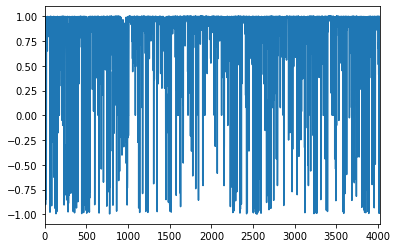

In [72]:
trans_eng_final.pol_score.plot()

In [82]:
trans_eng_final_gb = trans_eng_final.groupby(by=['date']).median()

In [83]:
trans_eng_final_gb.head()

,positive,negative,pol_score
date,,,
2019.10.15,0.98480,0.01520,0.96950
2019.10.16,0.99355,0.00645,0.98715
2019.10.17,0.99305,0.00695,0.98615
2019.10.18,0.99530,0.00470,0.99070
2019.10.19,0.76700,0.23300,0.53390


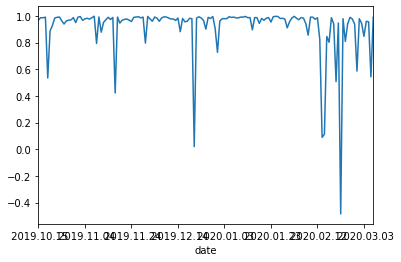

In [88]:
trans_eng_final_gb.pol_score.plot()

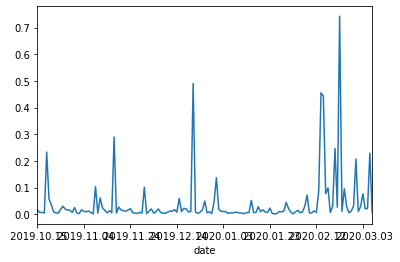

In [90]:
trans_eng_final_gb.negative.plot()

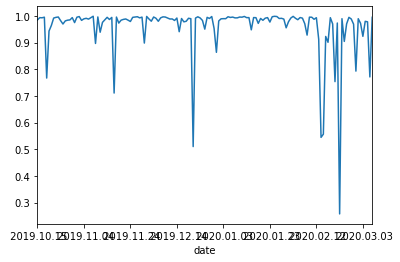

In [91]:
trans_eng_final_gb.positive.plot()

In [92]:
trans_eng_final_gb.to_excel("article_pos_nega_scores.xlsx")